## Financial Spreading Info Extraction Model Package from AWS Marketplace 


Financial Spreading Info Extraction detects finance related tables like balance sheet, cash flow, income statement etc. and extracts the content as key value pairs. The solution uses text matching, NLP and Machine Learning to localize and identify financial tables and extract information. This will help banks, and other financial institutions to rapidly analyse borrowers'/clients' financial standings and associated risks. 

Automate financial spreading information extraction from company's digital financial statements. This reduces manual effort for a non-value added activity and improves the productivity of financial analysts, insurance brokers, data entry operators.

This solution uses key word matching, NLP and Machine Learning  to accurately identify  tables in digital documents. It can recognise assets/liabilities, income sources and expense line items. The output will contain list of pages with content, financial periods and key metrics mapped to respective financial terms. 


This sample notebook shows you how to deploy Mphasis DeepInsights: Financial Spreading Info Extraction.



#### Pre-requisites:
1. **Note**: This notebook contains elements which render correctly in Jupyter interface. Open this notebook from an Amazon SageMaker Notebook Instance or Amazon SageMaker Studio.
1. Ensure that IAM role used has **AmazonSageMakerFullAccess**
1. To deploy this ML model successfully, ensure that:
    1. Either your IAM role has these three permissions and you have authority to make AWS Marketplace subscriptions in the AWS account used: 
        1. **aws-marketplace:ViewSubscriptions**
        1. **aws-marketplace:Unsubscribe**
        1. **aws-marketplace:Subscribe**  
    2. or your AWS account has a subscription to Mphasis DeepInsights: Financial Spreading Info Extraction. If so, skip step: [Subscribe to the model package](#1.-Subscribe-to-the-model-package)

#### Contents:
1. [Subscribe to the model package](#1.-Subscribe-to-the-model-package)
2. [Create an endpoint and perform real-time inference](#2.-Create-an-endpoint-and-perform-real-time-inference)
   1. [Create an endpoint](#A.-Create-an-endpoint)
   2. [Create input payload](#B.-Create-input-payload)
   3. [Perform real-time inference](#C.-Perform-real-time-inference)
   4. [Visualize output](#D.-Visualize-output)
   5. [Delete the endpoint](#E.-Delete-the-endpoint)
3. [Perform batch inference](#3.-Perform-batch-inference) 
4. [Clean-up](#4.-Clean-up)
    1. [Delete the model](#A.-Delete-the-model)
    2. [Unsubscribe to the listing (optional)](#B.-Unsubscribe-to-the-listing-(optional))
    

#### Usage instructions
You can run this notebook one cell at a time (By using Shift+Enter for running a cell).

### 1. Subscribe to the model package

To subscribe to the model package:
1. Open the model package listing page **Financial Spreading Info Extraction.**
1. On the AWS Marketplace listing, click on the **Continue to subscribe** button.
1. On the **Subscribe to this software** page, review and click on **"Accept Offer"** if you and your organization agrees with EULA, pricing, and support terms. 
1. Once you click on **Continue to configuration button** and then choose a **region**, you will see a **Product Arn** displayed. This is the model package ARN that you need to specify while creating a deployable model using Boto3. Copy the ARN corresponding to your region and specify the same in the following cell.

In [72]:
model_package_arn = 'arn:aws:sagemaker:us-east-2:786796469737:model-package/mphasis-marketplace-financial-spreading-info-v6'

In [73]:
import base64
import json 
import uuid
from sagemaker import ModelPackage
import sagemaker as sage
from sagemaker import get_execution_role
from sagemaker import ModelPackage
#from urllib.parse import urlparse
import boto3
from IPython.display import Image
from PIL import Image as ImageEdit
#import urllib.request
import numpy as np

In [74]:
content_type='application/zip'
model_name='financial-spreading-model'
real_time_inference_instance_type='ml.m5.xlarge'


### 2. Create an endpoint and perform real-time inference

If you want to understand how real-time inference with Amazon SageMaker works, see [Documentation](https://docs.aws.amazon.com/sagemaker/latest/dg/how-it-works-hosting.html).

In [75]:
from sagemaker import ModelPackage
import sagemaker as sage
from sagemaker import get_execution_role

role = get_execution_role()
sagemaker_session = sage.Session()

#### A. Create an endpoint

In [76]:
#Define predictor wrapper class
def predict_wrapper(endpoint, session):
    return sage.RealTimePredictor(endpoint, session,content_type=content_type)
#create a deployable model from the model package.
model = ModelPackage(role=role,
                    model_package_arn=model_package_arn,
                    sagemaker_session=sagemaker_session,
                    predictor_cls=predict_wrapper)

#Deploy the model
predictor = model.deploy(1, real_time_inference_instance_type, endpoint_name=model_name)

-------------!

Once endpoint has been created, you would be able to perform real-time inference.

#### B. Create input payload

Input.zip

	|--Input
    
		|--sample_financial_report.pdf

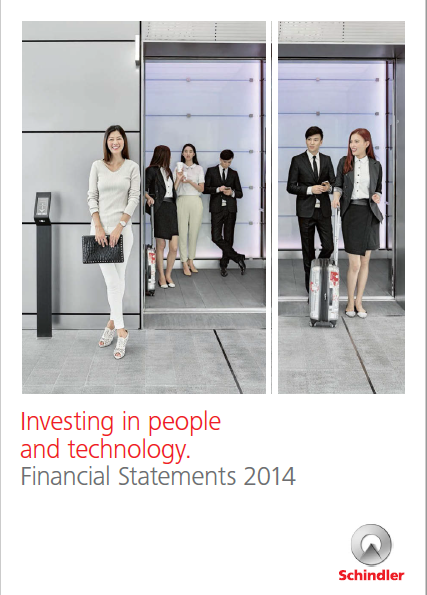

In [77]:
from IPython.display import display
from PIL import Image


path="./Input/sample pdf/sample_pdf_image.PNG"
display(Image.open(path))

In [78]:
file_name="./Input/Input.zip"

<Add code snippet that shows the payload contents>

#### C. Perform real-time inference

In [79]:
!aws sagemaker-runtime invoke-endpoint --endpoint-name $model_name --body fileb://$file_name --content-type 'application/zip' --region us-east-2 output.json

{
    "InvokedProductionVariant": "AllTraffic", 
    "ContentType": "application/json"
}


#### D. Visualize output

In [80]:
import json
with open('./Output/output.json') as f:
    data = json.load(f)

print("Output: ")

print(data)

Output: 
{u'balance_sheet': {u'page.No:188': {u'Content': u'\nDigital for all\n\nAnnual Report 2014-15186\n\nConsolidated Financial Statements\n\nParticulars\nPage \nNos.\n\nIndependent Auditor\u2019s Report 187\n\nConsolidated Income Statement 188\n\nConsolidated Statement of Comprehensive Income 188\n\nConsolidated Statement of Financial Position 189\n\nConsolidated Statement of Changes in Equity 190\n\nConsolidated Statement of Cash Flows 191\n\nNotes to Consolidated Financial Statements\n\n1. Corporate Information 192\n\n2. Basis of Preparation 192\n\n3. Summary of Significant Accounting Policies 192\n\n4. Significant Accounting Judgements, Estimates \nand Assumptions\n\n204\n\n5. Standards Issued But Not yet Effective up to \nthe Date of Issuance of the Group\u2019s Financial \nStatements\n\n206\n\n6. Segment Reporting 208\n\n7. Business Combination / Disposal of Subsidiary / \nOther Acquisitions / Transaction with Non-\ncontrolling Interest\n\n212\n\n8. Operating Expenses 214\n\n

#### <font>Copy and paste the output above in a json format reader to see the result. </font>

The Json format is as follows:

Balance sheet: {"page_no:XX": {content: ______, Years:______; sub-fields:______};
                "page_no:yy": {content: ______, Years:______; sub-fields:______}
                },
                
Cash flow: {"page_no:aa": {content: ______, Years:______; sub-fields:______};
                "page_no:bb": {content: ______, Years:______; sub-fields:______}
                },
                
Profit loss: {"page_no:cc": {content: ______, Years:______; sub-fields:______};
                "page_no:dd": {content: ______, Years:______; sub-fields:______}
                }
- Content: the whole page content
- Years: financial Years for which the figures are presented
- sub-fileds : Important fields in each table.

#### E. Delete the endpoint

Now that you have successfully performed a real-time inference, you do not need the endpoint any more. You can terminate the endpoint to avoid being charged.

In [81]:
predictor.delete_endpoint()

### 3. Perform batch inference

In this section, you will perform batch inference using multiple input payloads together. If you are not familiar with batch transform, and want to learn more, see these links:
1. [How it works](https://docs.aws.amazon.com/sagemaker/latest/dg/ex1-batch-transform.html)
2. [How to run a batch transform job](https://docs.aws.amazon.com/sagemaker/latest/dg/how-it-works-batch.html)

In [82]:
import json 
import uuid


transformer = model.transformer(1, 'ml.m5.4xlarge')
transformer.transform('s3://mphasis-marketplace/Financial_spreading/Input-1/Input.zip', content_type='application/zip')
transformer.wait()
#transformer.output_path
print("Batch Transform complete")
bucketFolder = transformer.output_path.rsplit('/')[3]

.........................2021-01-19T16:19:18.922:[sagemaker logs]: MaxConcurrentTransforms=1, MaxPayloadInMB=6, BatchStrategy=MULTI_RECORD
 * Serving Flask app "serve" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
 * Running on http://0.0.0.0:8080/ (Press CTRL+C to quit)
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 205-555-605
169.254.255.130 - - [19/Jan/2021 16:19:18] "#033GET /ping HTTP/1.1#033" 200 -
169.254.255.130 - - [19/Jan/2021 16:19:18] "#033GET /execution-parameters HTTP/1.1#033" 404 -
2
2021-01-19 16:19:19,188 [Thread-4    ] [WARNI]  Failed to see startup log message; retrying...
 * Serving Flask app "serve" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
 * Running on http://0.0.0.0:8080/ (Press CTRL+C to quit)
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 205-555-605
169.254.255.130 - - [19/Jan/2021 16:19:18] "#033GET /ping HTTP/1

In [83]:
#print(s3bucket,s3prefix)
s3_conn = boto3.client("s3")
bucket_name="sagemaker-us-east-2-786796469737"
with open('output.json', 'wb') as f:
    s3_conn.download_fileobj(bucket_name, bucketFolder+'/Input.zip.out', f)
    print("Output file loaded from bucket")

Output file loaded from bucket


In [84]:
import json
with open('output.json') as f:
    data = json.load(f)

print("Output: ")

print(data)

Output: 
{u'balance_sheet': {u'page.No:188': {u'Content': u'\nDigital for all\n\nAnnual Report 2014-15186\n\nConsolidated Financial Statements\n\nParticulars\nPage \nNos.\n\nIndependent Auditor\u2019s Report 187\n\nConsolidated Income Statement 188\n\nConsolidated Statement of Comprehensive Income 188\n\nConsolidated Statement of Financial Position 189\n\nConsolidated Statement of Changes in Equity 190\n\nConsolidated Statement of Cash Flows 191\n\nNotes to Consolidated Financial Statements\n\n1. Corporate Information 192\n\n2. Basis of Preparation 192\n\n3. Summary of Significant Accounting Policies 192\n\n4. Significant Accounting Judgements, Estimates \nand Assumptions\n\n204\n\n5. Standards Issued But Not yet Effective up to \nthe Date of Issuance of the Group\u2019s Financial \nStatements\n\n206\n\n6. Segment Reporting 208\n\n7. Business Combination / Disposal of Subsidiary / \nOther Acquisitions / Transaction with Non-\ncontrolling Interest\n\n212\n\n8. Operating Expenses 214\n\n

#### <font>Copy and paste the output above in a json format reader to see the result.</font>

The Json format is as follows:

Balance sheet: {"page_no:XX": {content: ______, Years:______; sub-fields:______};
                "page_no:yy": {content: ______, Years:______; sub-fields:______}
                },
                
Cash flow: {"page_no:aa": {content: ______, Years:______; sub-fields:______};
                "page_no:bb": {content: ______, Years:______; sub-fields:______}
                },
                
Profit loss: {"page_no:cc": {content: ______, Years:______; sub-fields:______};
                "page_no:dd": {content: ______, Years:______; sub-fields:______}
                }
- Content: the whole page content
- Years: financial Years for which the figures are presented
- sub-fileds : Important fields in each table.

### 4. Clean-up

#### A. Delete the model

delete the endpoint after you have used it to save resources.


#### B. Unsubscribe to the listing (optional)

If you would like to unsubscribe to the model package, follow these steps. Before you cancel the subscription, ensure that you do not have any [deployable model](https://console.aws.amazon.com/sagemaker/home#/models) created from the model package or using the algorithm. Note - You can find this information by looking at the container name associated with the model. 

**Steps to unsubscribe to product from AWS Marketplace**:
1. Navigate to __Machine Learning__ tab on [__Your Software subscriptions page__](https://aws.amazon.com/marketplace/ai/library?productType=ml&ref_=mlmp_gitdemo_indust)
2. Locate the listing that you want to cancel the subscription for, and then choose __Cancel Subscription__  to cancel the subscription.

